Use case: Bank Marketing Dataset. 
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit ?.

In [1]:
# import the needed packages.
import pandas as pd
import numpy as np

In [2]:
banking_df = pd.read_csv('banking.csv')

In [3]:
banking_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
# describe the dataset
banking_df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
print("rows : "+str(banking_df.shape[0]))
print(banking_df.dtypes)

rows : 41188
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [6]:
df = banking_df.copy()
df = banking_df.drop(['duration'], axis=1)

* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
# uniques of the columns
print(df.nunique())

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
y                   2
dtype: int64


In [9]:
# drop the duplicates

dups = df.duplicated()
print('before are there any duplicates : ', dups.any())
df.drop_duplicates(inplace=True)

# reset indices after dropping rows
df=df.reset_index(drop=True)

print('after are there any duplicates : ', df.duplicated().any())

before are there any duplicates :  True
after are there any duplicates :  False


In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


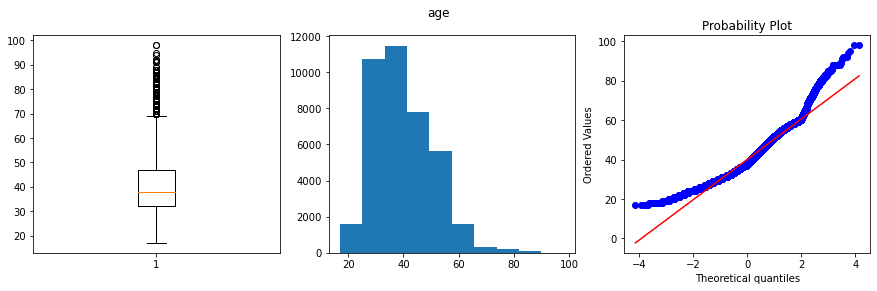

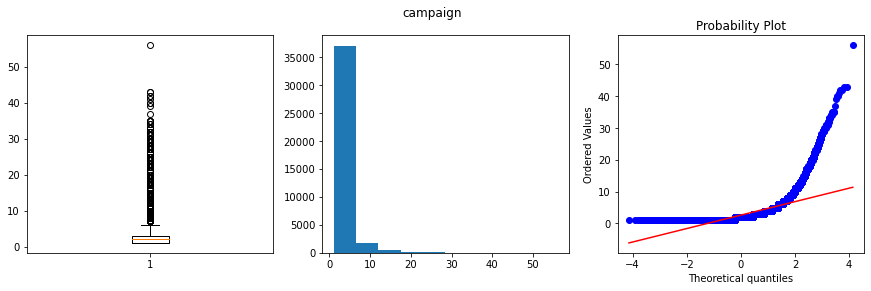

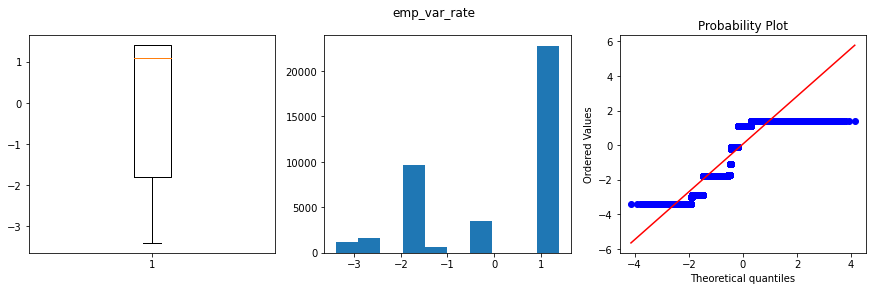

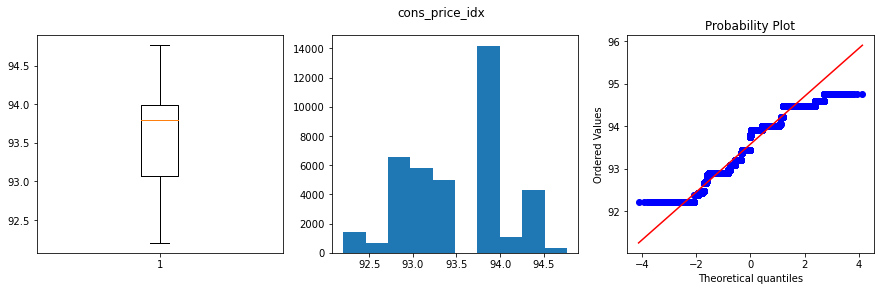

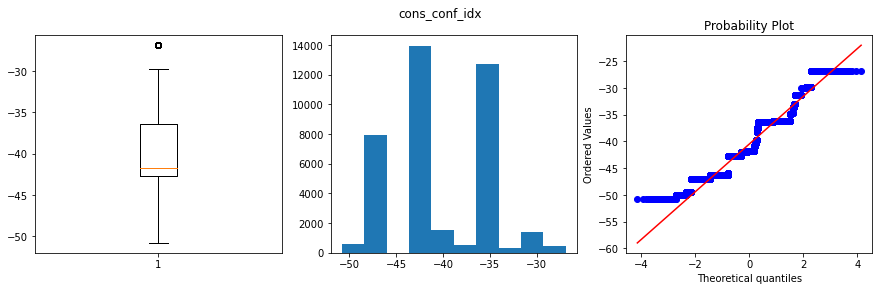

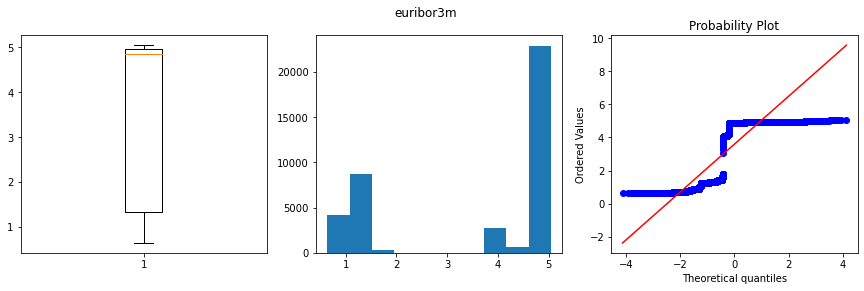

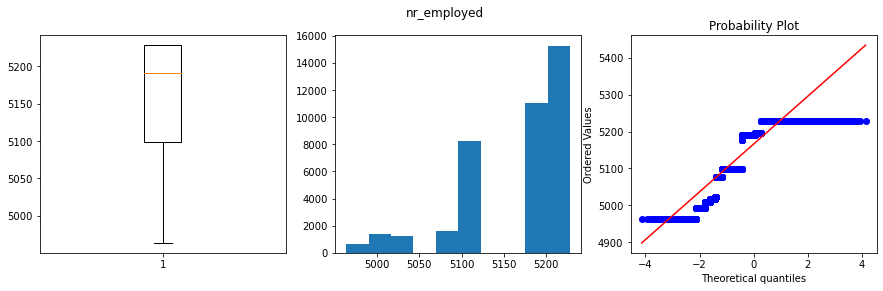

In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

cols = ['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m','nr_employed']   

for col in cols: 
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15, 4))
    fig.suptitle(col)
    axes[0].boxplot(df[col])
    axes[1].hist(df[col])
    stats.probplot(df[col], dist='norm', plot=axes[2])
    plt.show()

* The emp_var_rate, cons_price_idx, euribor3m and nr_employed have no outliers.

Before Shape: (39404, 20)
After Shape: (39403, 20)


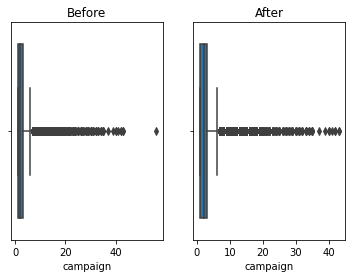

In [12]:
# remove outlier of campaign
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2)

df2 = df

col='campaign'

print("Before Shape:",df2.shape)
axes[0].title.set_text("Before")
sns.boxplot(df2[col],orient='v',ax=axes[0])

# Removing campaign above 50 
df2 = df2[ (df2[col]<50)]
print("After Shape:",df2.shape)

axes[1].title.set_text("After")
sns.boxplot(df2[col],orient='v',ax=axes[1])
df=df2;
plt.show()

# reset indices after dropping rows
df=df.reset_index(drop=True)

* In the campaign we can identify the outliers and let's remove them

Before Shape: (39403, 20)
After Shape: (38967, 20)


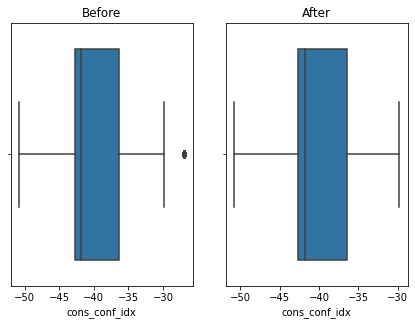

In [13]:
# remove outlier of cons_price_idx

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

df2 = df

col='cons_conf_idx'

print("Before Shape:",df2.shape)
axes[0].title.set_text("Before")
sns.boxplot(df2[col],orient='v',ax=axes[0])

# Removing cons_price_idx above -28 
df2 = df2[ (df2[col]<-28)]
print("After Shape:",df2.shape)

axes[1].title.set_text("After")
sns.boxplot(df2[col],orient='v',ax=axes[1])
df=df2;
plt.show()

# reset indices after dropping rows
df=df.reset_index(drop=True)

* Also, in the cons_conf_idx we can identify the outliers and let's remove them.

In [14]:
df_label = df.select_dtypes(include = np.object)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38967 entries, 0 to 38966
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          38967 non-null  object
 1   marital      38967 non-null  object
 2   education    38967 non-null  object
 3   default      38967 non-null  object
 4   housing      38967 non-null  object
 5   loan         38967 non-null  object
 6   contact      38967 non-null  object
 7   month        38967 non-null  object
 8   day_of_week  38967 non-null  object
 9   poutcome     38967 non-null  object
dtypes: object(10)
memory usage: 3.0+ MB


In [15]:
df_label.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
dtype: int64

* Then the features job, marital, education, default, housing, loan, month, day_of_week, and poutcome are used the one-hot encoding since they have more than 2 unique values.

In [16]:
df['contact'] = df['contact'].astype('category').cat.codes

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)

columns = ['job','marital','education','default','housing','loan','month','day_of_week','poutcome']

df_encoded = pd.DataFrame (encoder.fit_transform(df[columns]))

df_encoded.columns = encoder.get_feature_names(columns)
df.drop(columns ,axis=1, inplace=True)

df= pd.concat([df, df_encoded ], axis=1)

In [18]:
contact_data = df.drop(['contact'] ,axis=1, inplace=True)
df= pd.concat([df, contact_data ], axis=1)

cont_cols =  ['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 
              'cons_conf_idx', 'euribor3m', 'nr_employed']

cont_indies = [df.columns.get_loc(col) for col in cont_cols]
print(cont_indies)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [19]:
df.head(5)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>]], dtype=object)

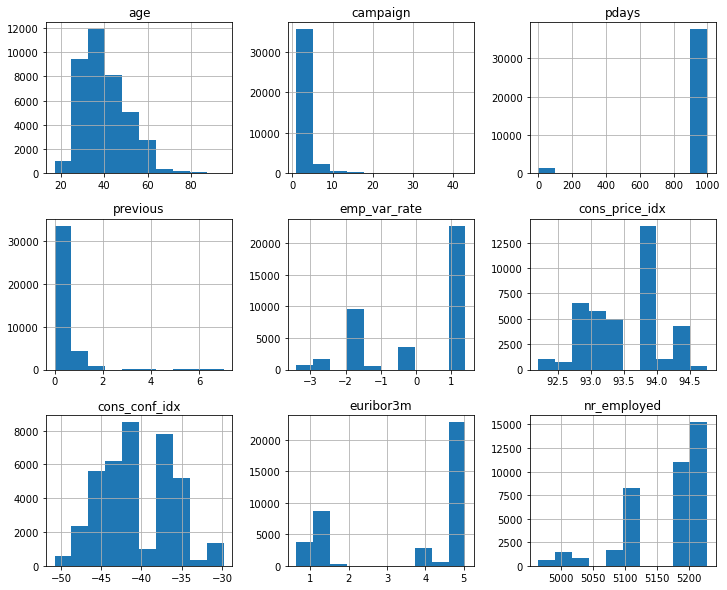

In [21]:
df[cont_cols].hist(figsize = (12,10))

* age, campaign and previous are right skewed and nr_employed is left skewed

In [22]:
#Do the logarithm trasnformations for required features
from sklearn.preprocessing import FunctionTransformer

logarithm_transformer = FunctionTransformer(np.log1p, validate=True)

# apply the transformation to your data
columns = ['age', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(df[columns])

df['age'] = to_right_skewed[:, 0]
df['campaign'] = to_right_skewed[:, 1]
df['previous'] = to_right_skewed[:, 2]

* Therefore, to reduce the skewness and come to normal distribution form, the age, campaign and previous are applied log transformation.

In [23]:
columns = ['nr_employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(df[columns])
df['nr_employed'] = to_left_skewed[:, 0]

* nr_employed is applied x² transformation.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>]], dtype=object)

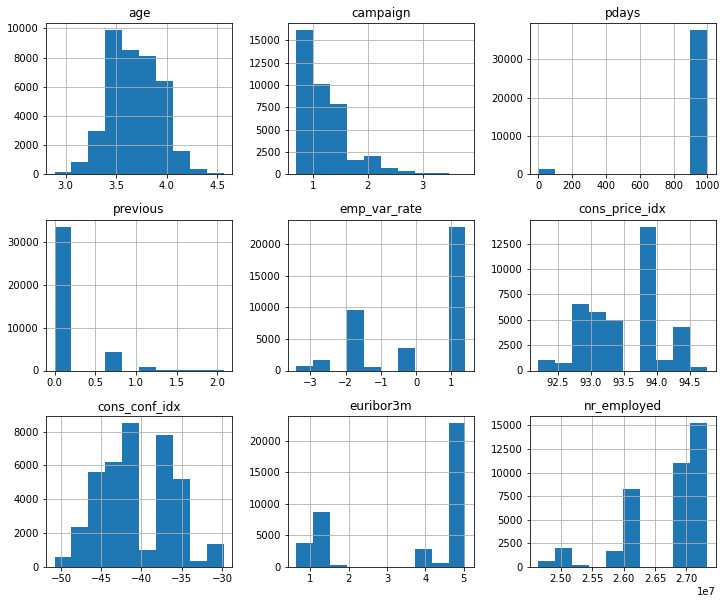

In [24]:
df[cont_cols].hist(figsize = (12,10))

In [25]:
df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3.806662,0.693147,999,0.000000,1.4,93.444,-36.1,4.963,27333029.61,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,3.988984,0.693147,999,0.000000,-0.1,93.200,-42.0,4.021,26996337.64,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.367296,1.386294,6,1.098612,-1.7,94.055,-39.8,0.729,24916070.56,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3.688879,1.098612,999,0.000000,-1.8,93.075,-47.1,1.405,26000820.81,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.025352,0.693147,3,0.693147,-2.9,92.201,-31.4,0.869,25767806.44,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
from sklearn.preprocessing import KBinsDiscretizer

data = pd.DataFrame(df, columns=['age'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
x = pd.DataFrame(_discretize, columns=['age'])
df['age'] = x['age']

* Here I used 10 bins for the feature age.

In [27]:
from sklearn.preprocessing import StandardScaler

df2 = df

# Removing Categorical Features before the feature scaling
columns = df.columns
# Continous col
columns_cont = np.delete(columns,np.s_[9:])
# Categorical col
columns_categorical = np.delete(columns,np.s_[0:9])

# except age since it is discretized
except_age_cont = np.delete(columns_cont, [0])


# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
Except = pd.DataFrame(df, columns = except_age_cont)
scaler.fit(Except)

df = pd.DataFrame(scaler.transform(Except), columns = except_age_cont).join(df[columns_categorical])
df = df.join(df2['age'])

* continuous data are added Standardization (except the age, since it is discretized)

In [28]:
# Get age in last column to first column
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]  #make last column first
df=df[cols]

* Get age in last column to first column

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>]], dtype=object)

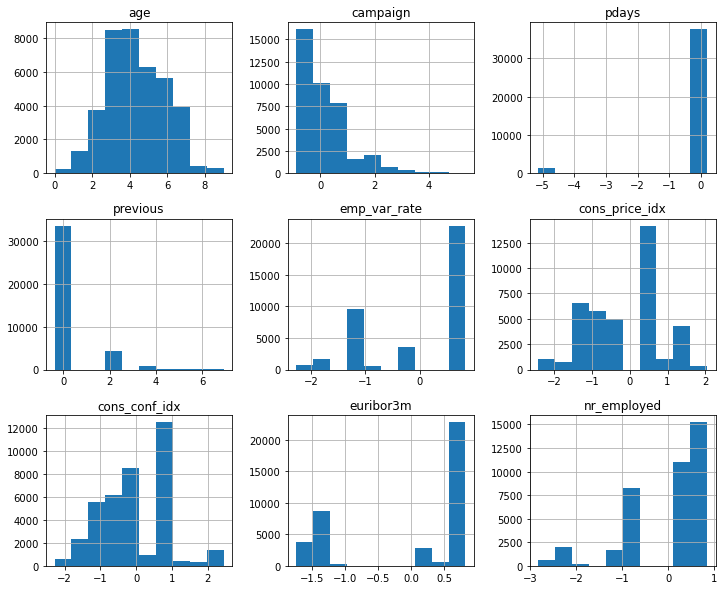

In [29]:
df[columns_cont].hist(figsize = (12,10))

Split the Dataset

In [30]:
# set apparent temperature as target
columns_value = df.columns
index = np.argwhere(columns_value == 'y')
columns_value_new = np.delete(columns_value, index)


data = pd.DataFrame(df, columns=columns_value_new)

# target as Y
selected_columns = ['y']
y_true = df[selected_columns].copy()

# X as indipendent 
X = data

<AxesSubplot:ylabel='y'>

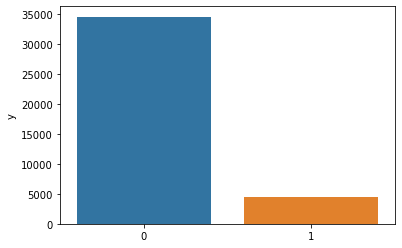

In [32]:
sns.barplot(x=df['y'].value_counts().index, y=df['y'].value_counts())

In [33]:
#!pip install imblearn

In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state = 100)

smt = SMOTE(random_state = 101)
X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48360, 60) (48360, 1)
(11691, 60) (11691, 1)


* when split the dataset, add SMOTE due to the y class imbalance 

In [35]:
X_train.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,6.0,-0.887760,0.195816,-0.383443,0.646512,0.702885,0.957520,0.709272,0.323060,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,1.635141,0.195816,-0.383443,0.841010,-0.254857,1.025080,0.770130,0.850423,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,-0.071207,0.195816,-0.383443,0.841010,1.523061,-0.258557,0.770130,0.850423,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,6.0,0.508148,0.195816,-0.383443,0.841010,-0.254857,1.025080,0.772448,0.850423,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,-0.887760,0.195816,-0.383443,-1.233637,-1.214341,-1.249435,-1.372076,-0.967088,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
y_train.head()

,y
0,0
1,0
2,0
3,0
4,0


<Figure size 1152x1152 with 0 Axes>

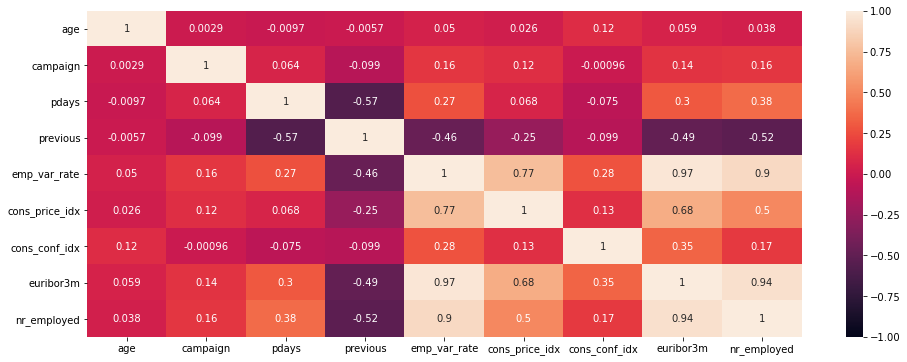

In [37]:
#correlation matrix

df_for_feature_eng = df[columns_cont]
plt.figure(figsize=(16, 16))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_for_feature_eng.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

Dependent Features
    emp_var_rate
    cons_price_idx 
    euribor3m
    nr_employed
    
Independent Features
    age
    campaign
    pdays
    previous
    cons_conf_idx

<Figure size 1152x1152 with 0 Axes>

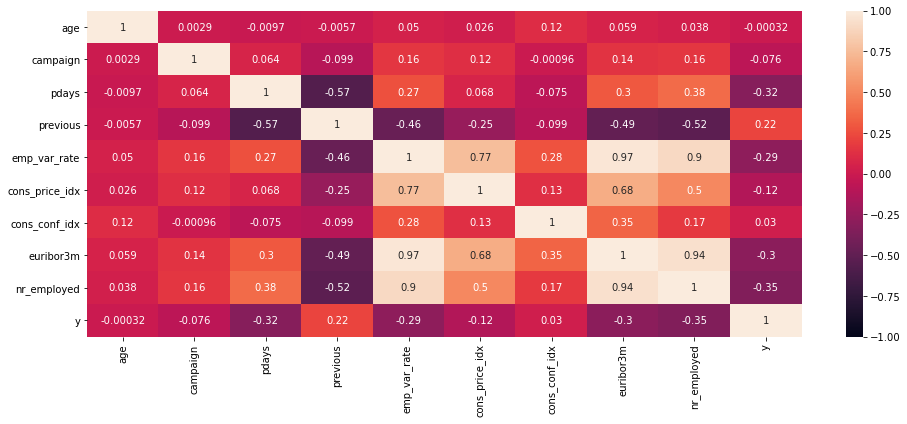

In [38]:
#correlation matrix

df_for_feature_eng = df[columns_cont]
df_for_feature_eng= df_for_feature_eng.join(df['y'])
plt.figure(figsize=(16, 16))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_for_feature_eng.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

*  decide to to keep nr_employed and drop the euribor3m, emp_var_rate and emp_pricce_idx since they are depended each other.

In [39]:
# drop emp_var_rate, cons_price_idx ,euribor3m

X_train = X_train.drop('emp_var_rate', 1)
X_train = X_train.drop('cons_price_idx', 1)
X_train = X_train.drop('euribor3m', 1)

X_test = X_test.drop('emp_var_rate', 1)
X_test = X_test.drop('cons_price_idx', 1)
X_test = X_test.drop('euribor3m', 1)

In [40]:
len(X_train.columns)

57

In [41]:
from sklearn.decomposition import PCA

# see explained variance ratios
pca = PCA()
pca.fit(X_train)

PCA()

In [42]:
pca.explained_variance_ratio_

array([2.89831221e-01, 2.20225598e-01, 8.19276936e-02, 6.11682316e-02,
       4.44602057e-02, 3.69234672e-02, 2.80802517e-02, 2.28714548e-02,
       1.77376996e-02, 1.48948859e-02, 1.44551119e-02, 1.40578811e-02,
       1.28467409e-02, 1.17645285e-02, 1.16158654e-02, 1.10703493e-02,
       1.08288157e-02, 1.05338191e-02, 8.29561238e-03, 7.82337753e-03,
       7.17927161e-03, 6.71702239e-03, 5.96404048e-03, 5.79888876e-03,
       4.63352082e-03, 4.14075211e-03, 3.93255474e-03, 3.48693637e-03,
       3.35252819e-03, 2.93221696e-03, 2.66063107e-03, 2.30071350e-03,
       2.11062779e-03, 1.82797411e-03, 1.70501384e-03, 1.65065732e-03,
       1.54542257e-03, 1.43152910e-03, 1.36855143e-03, 1.23269698e-03,
       9.94942875e-04, 5.81212077e-04, 4.71295074e-04, 4.04809205e-04,
       1.30586763e-04, 2.70994913e-05, 5.69345101e-06, 5.71591298e-32,
       2.11038958e-33, 2.11038958e-33, 2.11038958e-33, 2.11038958e-33,
       2.11038958e-33, 2.11038958e-33, 2.11038958e-33, 2.11038958e-33,
      

In [43]:
pca.explained_variance_ratio_[:23].sum()

0.9512731454012125

* By using the attribute explained_variance_ratio_ the variance first principal components contain up to 95% are taken to the model training.

In [44]:
pca = PCA(n_components = 23)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Train the model

In [45]:
#Import svm model
from sklearn import svm

# Create a svm Classifier
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
clf = svm.SVC(kernel='rbf',  gamma=0.001, C=100)

#Train the model using the training sets
clf.fit(X_train_pca, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_pca)

* Gamma decides t curvature of the decision boundary and C adds a penalty for each misclassified data point.

<AxesSubplot:ylabel='y'>

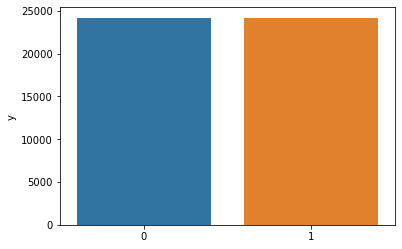

In [46]:
sns.barplot(x=y_train['y'].value_counts().index, y=y_train['y'].value_counts())

Model evaluation

In [47]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8391070053887606


<Figure size 576x576 with 0 Axes>

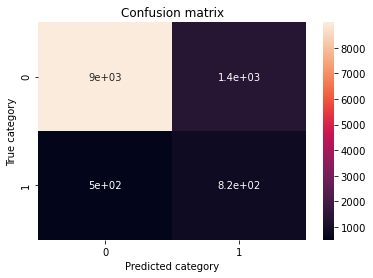

In [48]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show() 

In [49]:
print("Precision : ", metrics.precision_score(y_test, y_pred))
print("Recall : ", metrics.recall_score(y_test, y_pred))

Precision :  0.37363636363636366
Recall :  0.6203773584905661


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     10366
           1       0.37      0.62      0.47      1325

    accuracy                           0.84     11691
   macro avg       0.66      0.74      0.69     11691
weighted avg       0.88      0.84      0.86     11691

